# Multiple Linear Regression with SK-Learn

Dataset: [Graduate Admission 2](https://www.kaggle.com/mohansacharya/graduate-admissions)

### Import Necessary Libraries

In [1]:
import pandas as pd #Import Pandas
import seaborn as sb #Import Seaborn
import matplotlib.pyplot as plt #Import Matplotlib

### Load Data & Pre-Processing

In [3]:
#Load Dataset
data = pd.read_csv('Admission_Predict_Ver1.1.csv') 
data=data.drop(columns=['Serial No.']) #Remove Serial No. Column

In [4]:
#Display DataFrame Head
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#Display DataFrame Columns
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# checking for missing data
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#Check Dataframe Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
# rename some columns
Data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'university_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

In [9]:
#calculating some statistical data like percentile, 
#mean and std of the numerical values of the DataFrame
data.describe()

,GRE,TOEFL,university_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Exploratory Data analysis

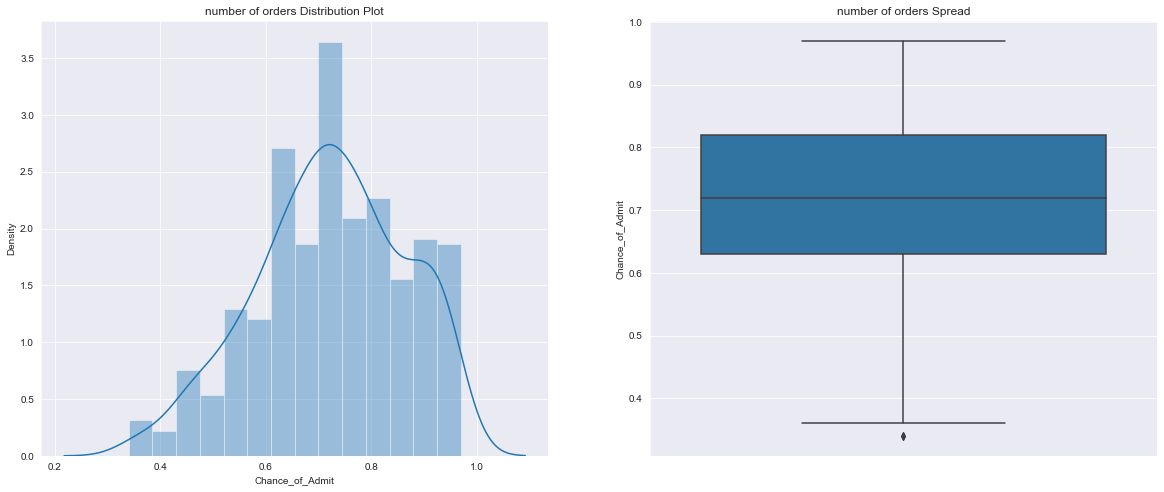

In [10]:
# visualize the target variable
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

<AxesSubplot:xlabel='university_Rating', ylabel='Chance_of_Admit'>

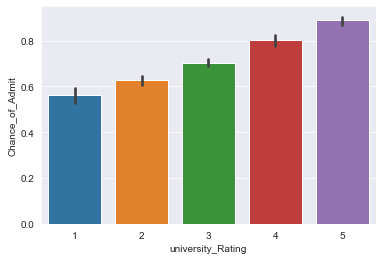

In [11]:
sb.barplot(data.university_Rating,data.Chance_of_Admit)

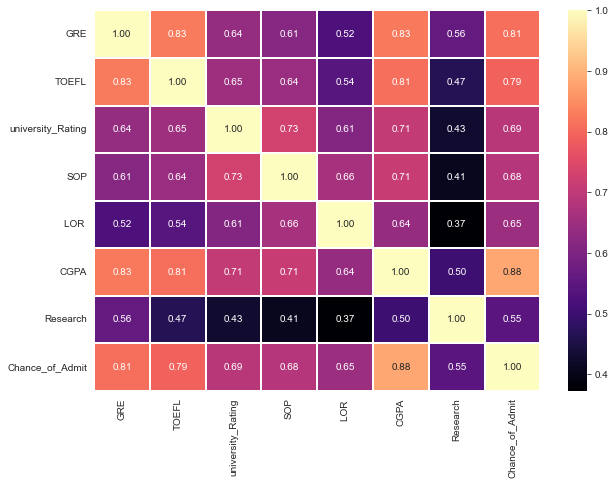

In [12]:
#Heat-Map For Compute pairwise correlation of columns
plt.figure(figsize=(10,7))
cr = data.corr()
sb.heatmap(cr, annot=True, linewidths=0.1, fmt= '.2f',cmap="magma")
plt.show()

As We can see ['CGPA','GRE Score','TOEFL Score'] are strongly correlated with dependent variable - <span style="color:green"><b>'Chance of Admit '</b></span>

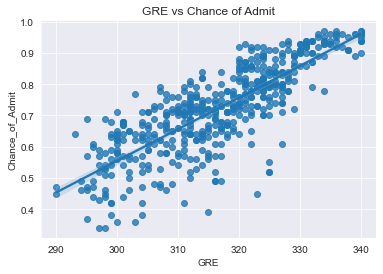

In [13]:
#RegPlot for GRE & Chance_Of_Admit

fig = sb.regplot(data.GRE,data.Chance_of_Admit)
plt.title("GRE vs Chance of Admit")
plt.show()

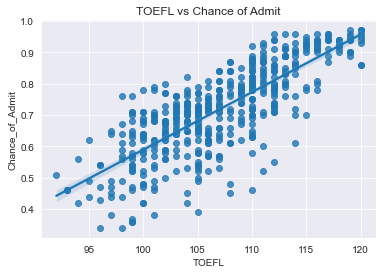

In [14]:
#RegPlot for TOEFL & Chance_Of_Admit

sb.regplot(data.TOEFL,data.Chance_of_Admit)
plt.title("TOEFL vs Chance of Admit")
plt.show()

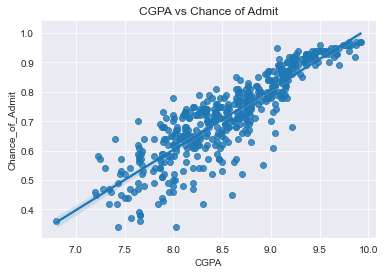

In [15]:
#RegPlot for CGPA & Chance_Of_Admit

sb.regplot(data.CGPA,data.Chance_of_Admit)
plt.title("CGPA vs Chance of Admit")
plt.show()

In [16]:
#Square Chance_of
(data.corr()**2)["Chance_of_Admit"].sort_values(ascending = False)[1:]

CGPA                 0.778652
GRE                  0.656668
TOEFL                0.627625
university_Rating    0.476283
SOP                  0.468043
LOR                  0.416495
Research             0.297975
Name: Chance_of_Admit, dtype: float64

In [17]:
# Performing some transformation 
data['Chance_of_Admit']=data['Chance_of_Admit']**2

In [18]:
# remove some outliers
## Deleting those some outliers. 
# previous_data = data.copy()
data = data[data.Chance_of_Admit >0.40]
data.reset_index(drop = True, inplace = True)

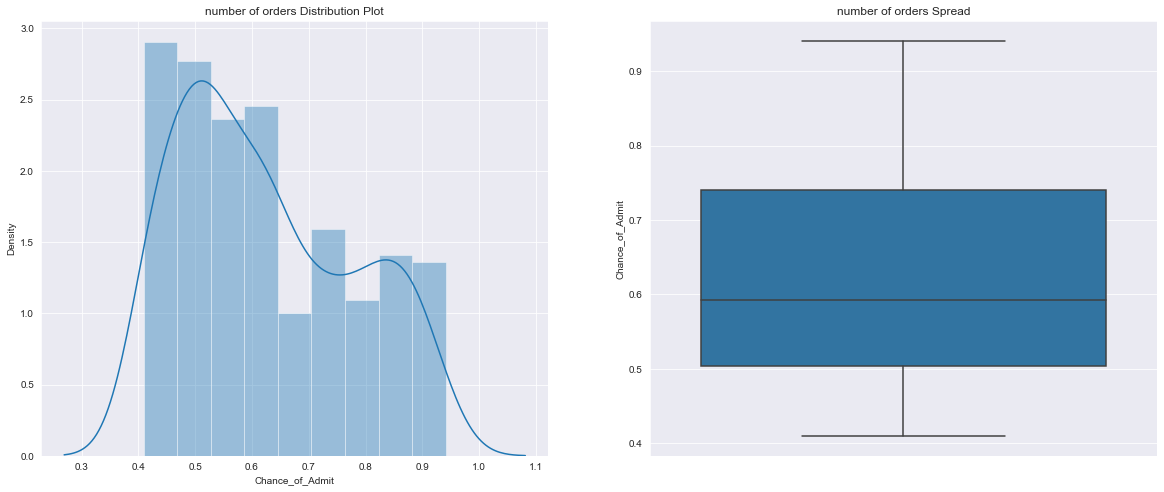

In [19]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()


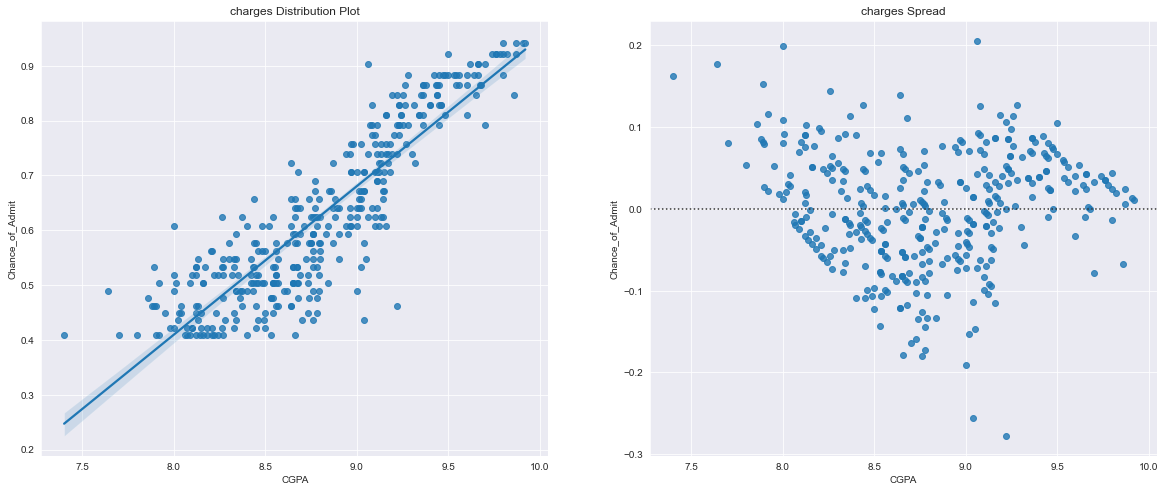

In [20]:

plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.CGPA, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.CGPA, data.Chance_of_Admit)

plt.show()

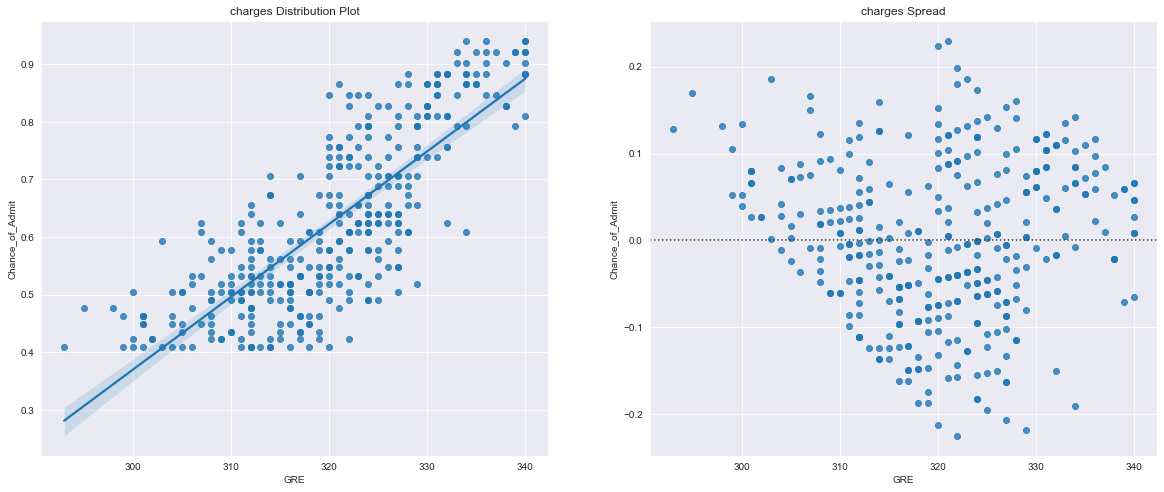

In [21]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.GRE, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.GRE, data.Chance_of_Admit)

plt.show()

### Creating a Linear Regression Model & Training

In [22]:
x = data.iloc[:, :-1].values #Select All Column Except Last Column
y = data.iloc[:, 7].values #Select All Values of Last Column

In [23]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) #Train & Test

In [24]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#standardize the dataset’s features
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [25]:
# using pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
# fitting PCA on the training set only
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.61921189 0.13703767]


In [26]:
from sklearn import preprocessing
n1=preprocessing.normalize(X_train) #Normalize Training Set

In [27]:
# Fitting linear regression Regression to the dataset
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression()
Lin_regressor.fit(X_train, y_train) #Training
y_pred=Lin_regressor.predict(X_test) #Get Predicton for Test Set
y_train_pred=Lin_regressor.predict(X_train) #Get Predicton for Training Set

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred)))
from sklearn.metrics import r2_score
print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred)*100)

RMSE score on the test set: 0.06458636660278361
RMSE score on the training set: 0.06203539516763837
R2 score on the test set: 82.29216489905946
R2 score on the training set: 83.42041387182823


In [29]:
from sklearn.ensemble import RandomForestRegressor
RDF_regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
RDF_regressor.fit(X_train, y_train)
y_pred2=RDF_regressor.predict(X_test)
y_train_pred2=RDF_regressor.predict(X_train)
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred2)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred2)))

print("R2 score on the test set:",r2_score(y_test, y_pred2)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred2)*100)

RMSE score on the test set: 0.06163859144112831
RMSE score on the training set: 0.02390249499248541
R2 score on the test set: 83.87167843652372
R2 score on the training set: 97.53860649172127


In [30]:
# cross validation
# Applying k-Fold Cross Validation USED TO JUST IMPROVE THE MODEL PERFORMANCE(ACCURACY)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Lin_regressor, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(),accuracies.std())

0.8205816154821273 0.0417027629797475


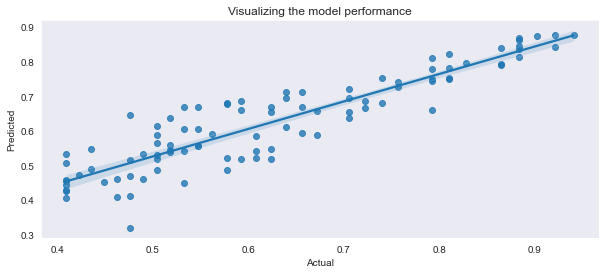

In [31]:
plt.figure(figsize=(10,4))
sb.set_style('darkgrid')
sb.regplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Visualizing the model performance')
plt.grid()


### Test Linear Regression Model

In [32]:
# our model is ready to predict y.
y_predict = Lin_regressor.predict(X_test)

In [33]:
# our model prediction
y_predict[:10]

array([0.5545905 , 0.45969253, 0.5398055 , 0.67006317, 0.31890853,
       0.58834413, 0.44172199, 0.45338511, 0.86326694, 0.52002521])

In [34]:
# y test
y_test[:10]

array([0.5476, 0.4624, 0.5184, 0.6241, 0.4761, 0.6724, 0.4096, 0.4096,
       0.8836, 0.5776])

In [35]:
from sklearn import metrics
#Check the Accuracy of the Model
metrics.mean_absolute_error(y_test,y_predict)

0.05313501697385051

### 5% Error Means our <span style="color:green"><b>Model is 95% correct </b></span>